# Chapter 6 : 고차원으로의 일반화

## 6.1 우리가 만든 벡터의 정의 확장하기

### 6.1.1 2차원 좌표 벡터 클래스 만들기

In [2]:
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)

In [8]:
v = Vec2(3,4)
w = v.add(Vec2(-2,6))
print(w.x, w.y)

1 10


In [9]:
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

### 6.1.2 Vec2 클래스 개선하기

In [11]:
# operator overloading
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    def __add__(self, v2):
        return self.add(v2)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)

In [12]:
3.0 * Vec2(1,0 ) + 4.0 * Vec2(0,1)

In [13]:
# operator overloading
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    def __add__(self, v2):
        return self.add(v2)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __repr__(self):
        return "Vec2({}, {})".format(self.x, self.y)

In [14]:
3.0 * Vec2(1,0) + 4.0 * Vec2(0,1)

Vec2(3.0, 4.0)

### 6.1.3 3차원 벡터에서의 반복 작업하기

In [17]:
class Vec3():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def add(self, other):
        return Vec3(self.x+other.x, self.y+other.y, self.z+other.z)
    def scale(self, scalar):
        return Vec3(scalar*self.x, scalar*self.y, scalar*self.z)
    def __eq__(self, other):
        return (self.x == other.x and self.y == other.y and self.z == other.z)
    def __add__(self, other):
        return self.add(other)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __repr__(self):
        return "Vec3({},{},{})".format(self.x, self.y, self.z)

In [18]:
2.0 * (Vec3(1,0,0) + Vec3(0,1,0))

Vec3(2.0,2.0,0.0)

In [19]:
def average(v1, v2):
    return 0.5 * v1 + 0.5 * v2

In [20]:
average(Vec2(9.0, 1.0), Vec2(8.0, 6.0))

Vec2(8.5, 3.5)

In [21]:
average(Vec3(1,2,3), Vec3(4,5,6))

Vec3(2.5,3.5,4.5)

### 6.1.4 벡터 기반 클래스 구축하기

In [22]:
from abc import ABCMeta, abstractmethod

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self, scalar):
        pass
    @abstractmethod
    def add(self, other):
        pass

In [23]:
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)

In [24]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)

In [31]:
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    def subtract(self,other):
        return self.add(-1 * other)
    def __sub__(self,other):
        return self.subtract(other)
    
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)

In [33]:
Vec2(1,3) - Vec2(5,1)

Vec2(-4,2)

### 6.1.6 벡터공간 클래스를 단위 테스트하기

In [36]:
s = -3
u, v = Vec2(42, -10), Vec2(1.5, 8)
s * (u + v) == s * v + s * u

True

In [39]:
from random import uniform

def random_scalar():
    return uniform(-10,10)
def random_vec2():
    return Vec2(random_scalar(), random_scalar())

a = random_scalar()
u, v = random_vec2(), random_vec2()
#assert a * (u + v ) == a * v + a * u

In [40]:
from math import isclose

def approx_equal_vec2(v, w):
    # x성분, y성분이 (같지 않아도) 근접한지 테스트한다.
    return isclose(v.x, w.x) and isclose(v.y, w.y)

for _ in range(0, 100): # 스칼라와 벡터쌍을 각각 100번 랜덤 생성해서 테스트한다.
    a = random_scalar()
    u, v = random_vec2(), random_vec2()
    assert approx_equal_vec2(a * (u + v), a * v + a * u)

In [41]:
def test(eq, a, b, u, v, w): #<1>
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))

for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_vec2(), random_vec2(), random_vec2()
    test(approx_equal_vec2, a,b,u,v,w)

### 6.1.7 연습문제

6.1 Vector 클래스를 상속받은 Vec3 클래스를 구현하라.

In [42]:
class Vec3(Vector):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def add(self, other):
        return Vec3(self.x+other.x, self.y+other.y, self.z+other.z)
    def scale(self, scalar):
        return Vec3(scalar*self.x, scalar*self.y, scalar*self.z)
    def __eq__(self, other):
        return (self.x==other.x and self.y==other.y and self.z==other.z)
    def __repr__(self):
        return "Vec3({},{},{})".format(self.x, self.y, self.z)

MINI-PROJECT Vector를 상속받고, 차원을 나타내는 abstract property를 포함한 Coordinate Vector 클래스를 구현하라.

In [44]:
from abc import abstractproperty
from vectors import add, scale

class CoordinateVector(Vector):
    @abstractproperty
    def dimension(self):
        pass
    def __init__(self,*coordinates):
        self.coordinates = tuple(x for x in coordinates)
    def add(self,other):
        return self.__class__(*add(self.coordinates, other.coordinates))
    def scale(self,scalar):
        return self.__class__(*scale(scalar, self.coordinates))
    def __repr__(self):
        return "{}{}".format(self.__class__.__qualname__, self.coordinates)

In [45]:
# 차원을 6이라고 선택하면 구체화된 클래스를 만들어 인스턴스화할 수 있다.
class Vec6(CoordinateVector):
    def dimension(self):
        return 6

In [46]:
Vec6(1,2,3,4,5,6) + Vec6(1,2,3,4,5,6)

Vec6(2, 4, 6, 8, 10, 12)

6.3 Vector 클래스에다가 주어진 벡터공간에 영벡터를 리턴하기 위해 zero 추상 메서드와 산술 부정(negation) 연산자의 구현을 추가하라.

In [47]:
from abc import ABCMeta, abstractmethod, abstractproperty

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    def subtract(self,other):
        return self.add(-1 * other)
    def __sub__(self,other):
        return self.subtract(other)
    @classmethod   # 영벡터 값은 오직 하나이기 때문에 zero는 클래스 메서드이다.
    @abstractproperty # zero는 abstract property이기도 한데 zero가 뭔지 아직 구체화하지 않았기 때문이다.
    def zero():
        pass
    def __neg__(self): # 산술 부정 연산자를 overloading하기 위한 특별한 메서드 명이다.
        return self.scale(-1)

In [49]:
# 부모 클래스에 __neg__의 정의가 포함되어 있으므로 자식 클래스가 __neg__를 구현할 필요가 없다. 각 클래스에서 zero는 구현해야 한다.
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

6.4 Vec3의 덧셈과 스칼라곱 연산이 벡터공간의 성질을 만족하는지 확인하는 단위 테스트를 작성하라.

In [50]:
def random_vec3():
    return Vec3(random_scalar(), random_scalar(), random_scalar())
def approx_equal_vec3(v, w):
    return isclose(v.x, w.x) and isclose(v.y, w.y) and isclose(v.z, w.z)

for i in range(0,100):
    a, b = random_scalar(), random_scalar()
    u, v, w = random_vec3(), random_vec3(), random_vec3()
    test(approx_equal_vec3, a, b, u, v, w)

6.5 임의의 벡터 v에 대해 $0 + \vec{v} = \vec{v}$, $0 \cdot \vec{v} = 0$, $-\vec{v} + \vec{v} = 0$ 임을 확인하는 단위 테스트를 추가하라. 여기서 0은 수 0이며 0은 영벡터이다.

In [51]:
def test(zero, eq, a, b, u, v, w):
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))
    #new tests
    assert eq(zero + v, v)
    assert eq(0 * v, zero)
    assert eq(-v + v, zero)
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_vec2(), random_vec2(), random_vec2()
    test(Vec2.zero(), approx_equal_vec2, a,b,u,v,w)

6.6 [연습문제 6.1]에서 본 Vec2와 Vec3에는 동등성 메서드가 구현되어 있는데, Vec2(1,2) == Vec3(1,2,3)는 True를 리턴한다.\
파이썬의 덕 타이핑(duck typing)이 너무 관대해서 그렇다. 벡터 동등성을 테스트하기 전에 클래스 종류가 맞아떨어지는지 확인하도록 수정하라.

In [52]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        assert self.__class__ == other.__class__
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return (self.__class__ == other.__class__
            and self.x == other.x and self.y == other.y)
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

6.7 벡터를 스칼라로 나눌 수 있도록 Vector 클래스에 __truediv__ 함수를 구현하라.

In [53]:
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    def subtract(self,other):
        return self.add(-1 * other)
    def __sub__(self,other):
        return self.subtract(other)
    @classmethod    
    @abstractproperty 
    def zero():
        pass
    def __neg__(self): 
        return self.scale(-1)
    def __truediv__(self, scalar):
        return self.scale(1.0/scalar)

In [54]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        assert self.__class__ == other.__class__
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return (self.__class__ == other.__class__
            and self.x == other.x and self.y == other.y)
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

In [55]:
Vec2(1,2)/2

Vec2(0.5,1.0)

## 6.2 여러 벡터공간 살펴보기

### 6.2.1 모든 좌표 벡터공간 나열해보기

In [56]:
class Vec1(Vector):
    def __init__(self,x):
        self.x = x
    def add(self,other):
        return Vec1(self.x + other.x)
    def scale(self,scalar):
        return Vec1(scalar * self.x)
    @classmethod
    def zero(cls):
        return Vec1(0)
    def __eq__(self,other):
        return self.x == other.x
    def __repr__(self):
        return "Vec1({})".format(self.x)

In [57]:
Vec1(2) + Vec1(2)

Vec1(4)

In [58]:
3 * Vec1(1)

Vec1(3)

In [59]:
class Vec0(Vector):
    def __init__(self):
        pass
    def add(self,other):
        return Vec0()
    def scale(self,scalar):
        return Vec0()
    @classmethod
    def zero(cls):
        return Vec0()
    def __eq__(self,other):
        return self.__class__ == other.__class__ == Vec0
    def __repr__(self):
        return "Vec0()"

In [60]:
- 3.14 * Vec0()

Vec0()

In [61]:
Vec0() + Vec0() + Vec0() + Vec0()

Vec0()

### 6.2.2 현실에서의 벡터공간 식별하기

In [62]:
class CarForSale():
    def __init__(self, model_year, mileage, price, posted_datetime, 
                 model, source, location, description):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description

In [63]:
from datetime import datetime

class CarForSale(Vector):
    retrieved_date = datetime(2018,11,30,12) # 카그래프 사이트 데이터셋은 2018년 11월 30일 정오에 취득하였다.
    def __init__(self, model_year, mileage, price, posted_datetime, 
                 model="(virtual)", source="(virtual)", 
                 location="(virtual)", description="(virtual)"):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description
    def add(self, other):
        def add_dates(d1, d2):
            age1 = CarForSale.retrieved_date - d1
            age2 = CarForSale.retrieved_date - d2
            sum_age = age1 + age2
            return CarForSale.retrieved_date - sum_age
        return CarForSale(
            self.model_year + other.model_year,
            self.mileage + other.mileage,
            self.price + other.price,
            add_dates(self.posted_datetime, other.posted_datetime)
        )
    def scale(self, scalar):
        def scale_date(d): # 기준점의 일자를 기준으로 한 시간 간격을 확대,축소해 날짜와 시간 속성을 확대,축소하는 보조 함수
            age = CarForSale.retrieved_date - d
            return CarForSale.retrieved_date - (scalar * age)
        return CarForSale(
            scalar * self.model_year,
            scalar * self.mileage,
            scalar * self.price,
            scale_date(self.posted_datetime)
        )
    @classmethod
    def zero(cls):
        return CarForSale(0,0,0, CarForSale.retrieved_date)


In [64]:
# load cargraph data from json file

from json import loads, dumps
from pathlib import Path
from datetime import datetime
contents = Path('cargraph.json').read_text()
cg = loads(contents)
cleaned = []

def parse_date(s):
    input_format="%m/%d - %H:%M"
    return datetime.strptime(s,input_format).replace(year=2018)
    
    return dt
for car in cg[1:]:
    try:
        row = CarForSale(int(car[1]), float(car[3]), float(car[4]), parse_date(car[6]), car[2],  car[5],  car[7], car[8])
        cleaned.append(row)
    except: pass

cars = cleaned

In [65]:
(cars[0] + cars[1]).__dict__

{'model_year': 4012,
 'mileage': 306000.0,
 'price': 6100.0,
 'posted_datetime': datetime.datetime(2018, 11, 30, 3, 59),
 'model': '(virtual)',
 'source': '(virtual)',
 'location': '(virtual)',
 'description': '(virtual)'}

In [66]:
average_prius = sum(cars, CarForSale.zero()) * (1.0/len(cars))

In [67]:
average_prius.__dict__

{'model_year': 2012.5365853658536,
 'mileage': 87731.63414634147,
 'price': 12574.731707317074,
 'posted_datetime': datetime.datetime(2018, 11, 30, 9, 0, 49, 756098),
 'model': '(virtual)',
 'source': '(virtual)',
 'location': '(virtual)',
 'description': '(virtual)'}

### 6.2.3 함수를 벡터처럼 다루기

In [68]:
# plotting utility function for functions in this chapter
import numpy as np
import matplotlib.pyplot as plt
from math import sin

def plot(fs, xmin, xmax):
    xs = np.linspace(xmin,xmax,100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    for f in fs:
        ys = [f(x) for x in xs]
        plt.plot(xs,ys)

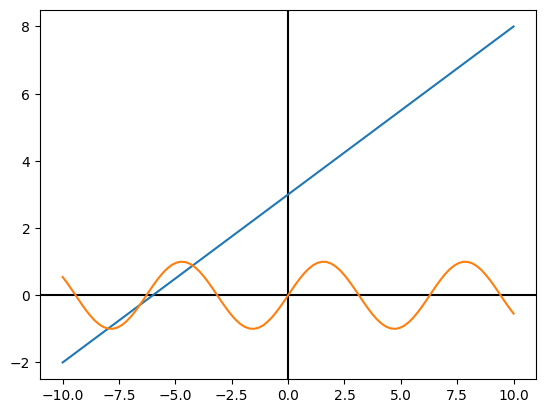

In [121]:
def f(x):
    return 0.5 * x + 3
def g(x):
    return sin(x)
plot([f,g],-10,10)

In [122]:
def add_functions(f,g):
    def new_function(x):
        return f(x) + g(x)
    return new_function

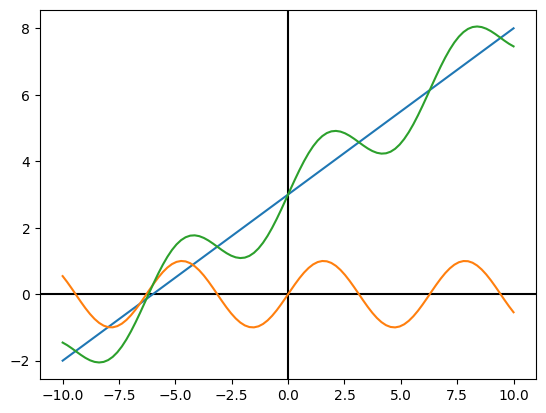

In [123]:
plot([f,g, add_functions(f,g)],-10,10)

In [139]:
def mul_functions(a, g):
    def new_function1(x):
        return a * g(x)
    return new_function1

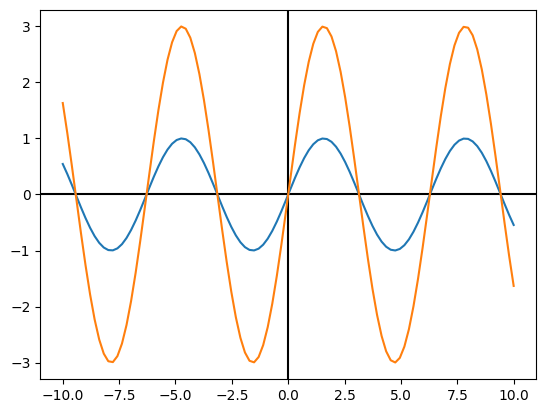

In [140]:
plot([g, mul_functions(3,g)], -10, 10)

### 6.2.4 행렬을 벡터처럼 다루기

In [141]:
# 벡터로 간주된 5X3 행렬을 표현하는 클래스
class Matrix5_by_3(Vector):
    rows = 5 
    columns = 3
    def __init__(self, matrix):
        self.matrix = matrix
    def add(self, other):
        return Matrix5_by_3(tuple(
            tuple(a + b for a,b in zip(row1, row2))
            for (row1, row2) in zip(self.matrix, other.matrix)
        ))
    def scale(self,scalar):
        return Matrix5_by_3(tuple(
            tuple(scalar * x for x in row)
            for row in self.matrix
        ))
    @classmethod
    def zero(cls):
        return Matrix5_by_3(tuple( 
            tuple(0 for j in range(0, cls.columns))
            for i in range(0, cls.rows)
        ))

### 6.2.5 벡터 연산으로 이미지 조작

In [154]:
from PIL import Image
class ImageVector(Vector):
    size = (300, 300) # 고정된 크기의 이미지를 다룬다.
    def __init__(self, input):
        try:
            img = Image.open(input).resize(ImageVector.size)
            self.pixels = img.getdata() # getdata() 메서드로 픽셀 리스트를 추출한다. 각 픽셀은 RGB값 튜플이다.
        except:
            self.pixels = input # 픽셀 리스트를 바로 받을 수 있다.
    def image(self):
        img = Image.new('RGB', ImageVector.size) # 클래스 속성을 저장된 픽셀을 재구성해 PIL 이미지를 리턴한다.
        img.putdata([(int(r), int(g), int(b)) for (r,g,b) in self.pixels]) # 표시가 가능한 이미지를 만들고자 픽셀값은 정수로 변환
        return img
    def add(self, img2):
        return ImageVector([(r1+r2,g1+g2,b1+b2) for ((r1,g1,b1),(r2,g2,b2)) in zip(self.pixels,img2.pixels)])
    def scale(self,scalar):
        return ImageVector([(scalar*r,scalar*g,scalar*b) for (r,g,b) in self.pixels])
    @classmethod
    def zero(cls): # zero 이미지는 모든 픽셀의 RGB값이 모두 0이다.
        total_pixels = cls.size[0] * cls.size[1]
        return ImageVector([(0,0,0) for _ in range(0, total_pixels)])
    def _repr_png_(self):
        return self.image()._repr_png_()

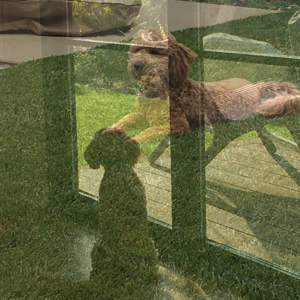

In [155]:
0.5 * ImageVector("inside.JPG") + 0.5 * ImageVector("outside.JPG")

In [156]:
white = ImageVector([(255,255,255) for _ in range(0,300*300)])

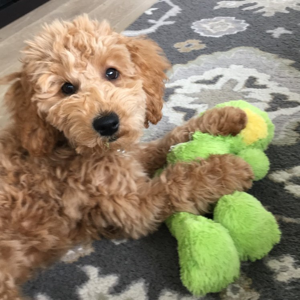

In [157]:
ImageVector("melba_toy.JPG")

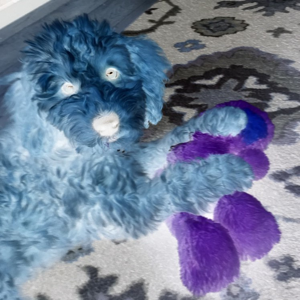

In [158]:
white - ImageVector("melba_toy.JPG")

### 6.2.6 연습문제

6.9 벡터공간 단위 테스트를 실행해서 CarForSale 객체가 벡터공간을 형상함을 보여라.

In [159]:
from math import isclose
from random import uniform, random, randint
from datetime import datetime, timedelta

def random_time():
    return CarForSale.retrieved_date - timedelta(days=uniform(0,10))

def approx_equal_time(t1, t2):
    test = datetime.now()
    return isclose((test-t1).total_seconds(), (test-t2).total_seconds())

def random_car():
    return CarForSale(randint(1990,2019), randint(0,250000), 
              27000. * random(), random_time())

def approx_equal_car(c1,c2):
    return (isclose(c1.model_year,c2.model_year) 
            and isclose(c1.mileage,c2.mileage) 
            and isclose(c1.price, c2.price)
            and approx_equal_time(c1.posted_datetime, c2.posted_datetime))
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_car(), random_car(), random_car()
    test(CarForSale.zero(), approx_equal_car, a,b,u,v,w)

6.10 일변수함수를 생성자의 인자로 받는 클래스 Function(Vector)를 구현하고, 이 클래스에 __call__ 메서드를 구현해서 객체를 함수처럼 다룰 수 있게 만들어라. 또한 해당 구현이 plot([f,g, f+g, 3*g],-10,10)을 올바르게 실행함을 보여라.

In [160]:
class Function(Vector):
    def __init__(self, f):
        self.function = f
    def add(self, other):
        return Function(lambda x: self.function(x) + other.function(x))
    def scale(self, scalar):
        return Function(lambda x: scalar * self.function(x))
    @classmethod
    def zero(cls):
        return Function(lambda x: 0)
    def __call__(self, arg):
        return self.function(arg)

In [161]:
f = Function(lambda x: 0.5 * x + 3)
g = Function(sin)

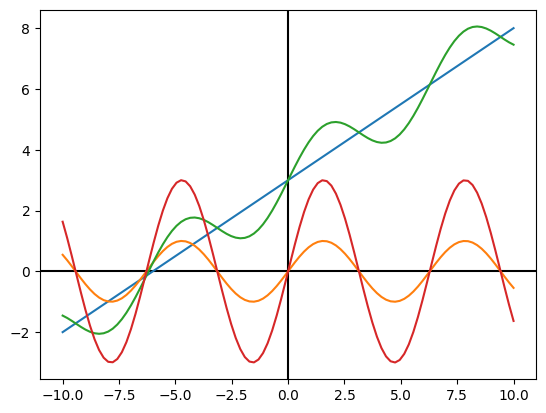

In [162]:
plot([f, g, f+g, 3*g], -10, 10)

6.11 두 함수가 같은지를 테스트 하는 함수를 작성해라.

In [163]:
def approx_equal_function(f,g):
    results = []
    for _ in range(0,10):
        x = uniform(-10,10)
        results.append(isclose(f(x),g(x)))
    return all(results)

In [164]:
approx_equal_function(lambda x: (x*x)/x, lambda x: x)

True

6.13 $f(x,y) = x + y.$ 와 같은 이변수함수를 저장한는 클래스 Function2(Vector)를 생성하라.

In [165]:
class Function2(Vector):
    def __init__(self, f):
        self.function = f
    def add(self, other):
        return Function2(lambda x,y: self.function(x,y) + other.function(x,y))
    def scale(self, scalar):
        return Function2(lambda x,y: scalar * self.function(x,y))
    @classmethod
    def zero(cls):
        return Function2(lambda x,y: 0)
    def __call__(self, *args):
        return self.function(*args)

In [166]:
f = Function2(lambda x,y:x+y)
g = Function2(lambda x,y: x-y+1)
(f+g)(3,10)

7

6.15 Vector를 상속받고 행의 개수와 열의 개수를 나타내는 abstract property를 포함한 Matrix클래스를 구현하라.\
Matrix 클래스를 초기화할 수 없는 대신 Matrix 클래스를 상속받고 행과 열의 개수를 명시한 Matrix5_by_3 클래스를 만들 수는 있다.

In [167]:
class Matrix(Vector):
    @abstractproperty
    def rows(self):
        pass
    @abstractproperty
    def columns(self):
        pass
    def __init__(self, entries):
        self.entries = entries
    def add(self, other):
        return self.__class__(
            tuple(tuple(self.entries[i][j] + other.entries[i][j] for j in range(0,self.columns()))for i in range(0,self.rows()))
            )
    def scale(self,scalar):
        return self.__class__(
            tuple(tuple(scalar * e for e in row) for row in self.entries)
            )
    def __repr__(self):
        return "%s%r" % (self.__class__.__qualname__, self.entries)
    def zero(self):
        return self.__class__(
            tuple(tuple(0 for i in range(0,self.columns())) for j in range(0,self.rows()))
            )

In [168]:
class Matrix2_by_2(Matrix):
    def rows(self):
        return 2
    def columns(self):
        return 2  

In [169]:
2 * Matrix2_by_2(((1,2),(3,4))) + Matrix2_by_2(((1,2),(3,4)))

Matrix2_by_2((3, 6), (9, 12))

6.19 ImageVector 클래스에 대한 영벡터를 더해도 임의의 이미지에 시각적으로 변환을 주지 않음을 확인해라.

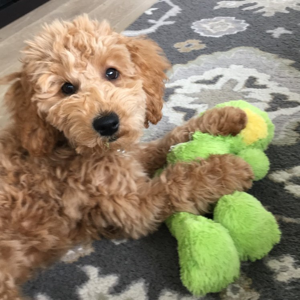

In [170]:
ImageVector("melba_toy.JPG")

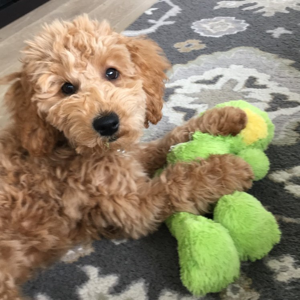

In [171]:
# unchanged
ImageVector("melba_toy.JPG") + ImageVector.zero()

6.20 두 이미지를 선택한 뒤 두 이미지의 서로 다른 가중 평균을 10개 출력하라.

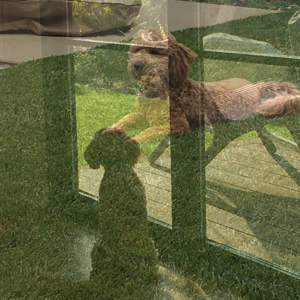

In [174]:
linear_combos = [s * ImageVector("inside.JPG") + (1-s) * ImageVector("outside.JPG") for s in [0.1*i for i in range(0,11)]]

linear_combos[5]

6.21 이미지에 벡터공간의 단위 테스트를 도입해 실행해라.

In [175]:
def random_image():
    return ImageVector([(randint(0,255), randint(0,255), randint(0,255))
                            for i in range(0,300 * 300)])

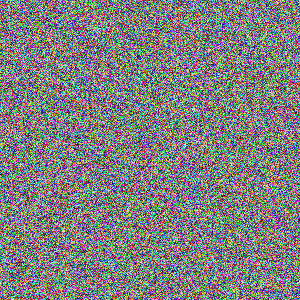

In [176]:
random_image()

In [177]:
def approx_equal_image(i1,i2):
    return all([isclose(c1,c2)
        for p1,p2 in zip(i1.pixels,i2.pixels)
        for c1,c2 in zip(p1,p2)])

## 6.3 보다 작은 벡터공간 살펴보기

### 함수의 벡터공간에 대한 부분공간 구하기

In [179]:
class LinearFunction(Vector):
    def __init__(self, a, b):
        self.a = a
        self.b = b
    def add(self, v):
        return LinearFunction(self.a + v.a, self.b + v.b)
    def scale(self,scalar):
        return LinearFunction(scalar * self.a, scalar * self.b)
    def __call__(self,x):
        return self.a * x + self.b
    @classmethod
    def zero(cls):
        return LinearFunction(0,0,0)

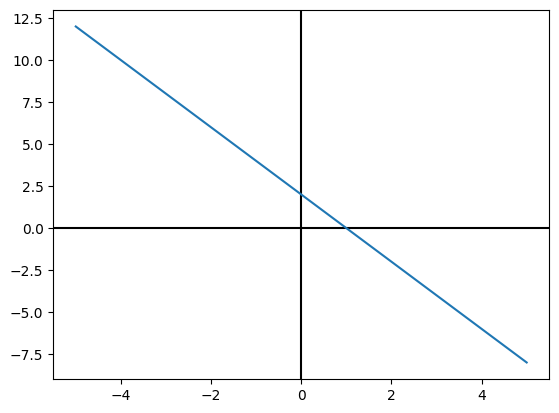

In [180]:
plot([LinearFunction(-2,2)], -5, 5)

In [181]:
gray = ImageVector([(1,1,1) for _ in range(0,300*300)])

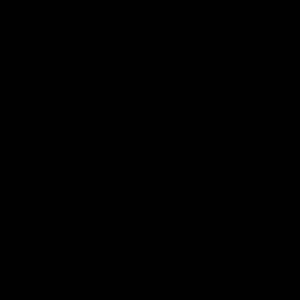

In [182]:
gray

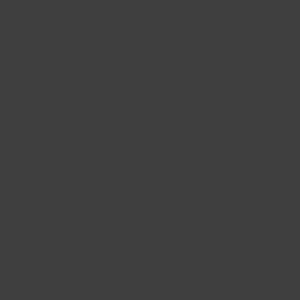

In [184]:
63*gray

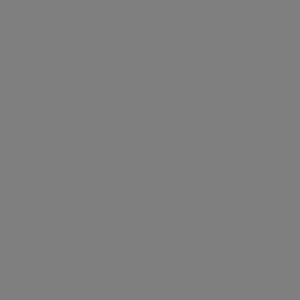

In [186]:
127*gray

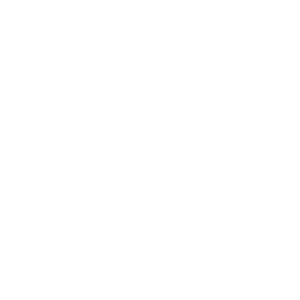

In [187]:
255*gray

### 6.3.7 연습문제

6.32 LinearFunction 클래스에 Vec2를 상속하고 __call__ 메서드를 구현하여 다시  만들어라.

In [188]:
class LinearFunction(Vec2):
    def __call__(self,input):
        return self.x * input + self.y

6.35 $ax^2 + bx + c$ 꼴 함수로 이루어진 벡터 부분공간을 나타내는 클래스 QuadraticFunction(Vector)를 구현하라.

In [189]:
class QuadraticFunction(Vector):
    def __init__(self,a,b,c):
        self.a = a
        self.b = b
        self.c = c
    def add(self,v):
        return QuadraticFunction(self.a + v.a, self.b + v.b, self.c + v.c)
    def scale(self,scalar):
        return QuadraticFunction(scalar * self.a, scalar * self.b, scalar * self.c)
    def __call__(self,x):
        return self.a * x * x + self.b * x + self.c
    @classmethod
    def zero(cls):
        return QuadraticFunction(0,0,0)

6.37 모든 다항함수에 대한 벡터공간은 무한 차원 부분공간이다.\
이 벡터공간을 클래스로 구현한 뒤 (무한집합일게 분명한) 기저 중 하나를 설명하라.

In [190]:
class Polynomial(Vector):
    def __init__(self, *coefficients):
        self.coefficients = coefficients
    def __call__(self,x):
        return sum(coefficient * x ** power for (power,coefficient) in enumerate(self.coefficients))
    def add(self,p):
        return Polynomial([a + b for a,b in zip(self.coefficients, p.coefficients)])
    def scale(self,scalar):
        return Polynomial([scalar * a for a in self.coefficients])
        return "$ %s $" % (" + ".join(monomials))
    @classmethod
    def zero(cls):
        return Polynomial(0)

6.39 모든 픽셀이 주어진 RGB값을 갖도록 단색 ImageVector 객체를 리턴하는 함수 solid_color(r,g,b)를 작성하라.

In [191]:
def solid_color(r,g,b):
    return ImageVector([(r,g,b) for _ in range(0,300*300)])

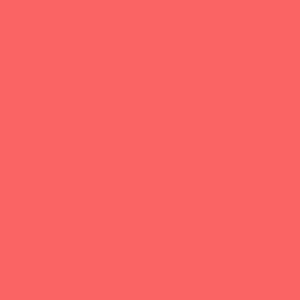

In [192]:
solid_color(250,100,100)

6.40 각 성분이 밝기 값인 30x30 행렬로 구현된 30x30 흑백 이미지로부터 ImageVector객체를 생성하는 선형사상을 작성하라.\
그 다음에 300x300 이미지를 입력으로 받아 (RGB값을 평균내어) 각 픽셀 밝기를 계산해 30x30 흑백 이미지를 만들어 대응시키는 선형사상을 구현하라.

In [193]:
image_size = (300,300)
total_pixels = image_size[0] * image_size[1]
square_count = 30 
square_width = 10

def ij(n):
    return (n // image_size[0], n % image_size[1])

def to_lowres_grayscale(img): 
    matrix = [
        [0 for i in range(0,square_count)]
        for j in range(0,square_count)
    ]
    for (n,p) in enumerate(img.pixels):
        i,j = ij(n)
        weight = 1.0 / (3 * square_width * square_width)
        matrix[i // square_width][ j // square_width] += (sum(p) * weight)
    return matrix

def from_lowres_grayscale(matrix): 
    def lowres(pixels, ij):
        i,j = ij
        return pixels[i // square_width][ j // square_width]
    def make_highres(limg):
        pixels = list(matrix)
        triple = lambda x: (x,x,x)
        return ImageVector([triple(lowres(matrix, ij(n))) for n in range(0,total_pixels)])
    return make_highres(matrix)

In [194]:
v = ImageVector("melba_toy.JPG")

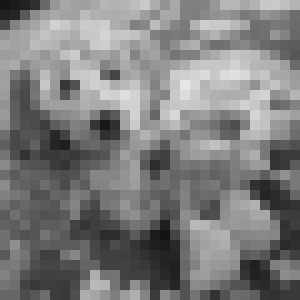

In [195]:
# a 30x30 list of numbers
lowres = to_lowres_grayscale(v)
from_lowres_grayscale(lowres)